# ELECTRICITY DEMAND PREDICTION - USING XGBOOST - MACHINE LEARNING

In [2]:
import warnings
warnings.filterwarnings("ignore")

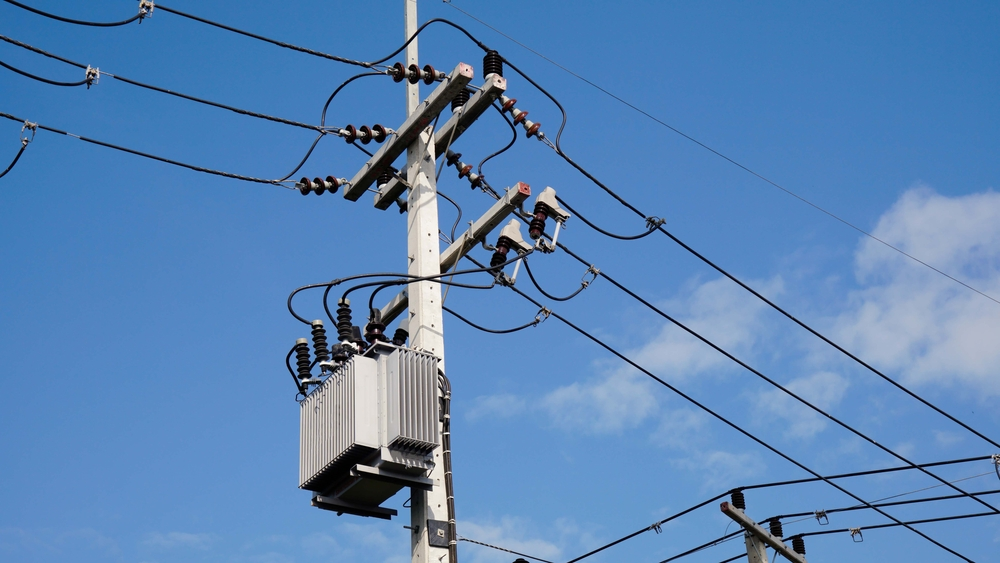

In [4]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
data = pd.read_csv("python machine learning model xgboost - electricity demand dataset.csv")
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [6]:
# Check basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [7]:
# Convert the column datatype to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


In [9]:
# Set the datetime column as dataframe's index
data = data.set_index('Timestamp')

In [10]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [11]:
# Using describe function to check the summary statistics
data[['Temperature','Humidity','Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [12]:
# Checking for missing values
data.isnull().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [13]:
# To show the records that containing the null values
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [14]:
# To show the records that contains all the null values
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop those rows that contains all missing values
data = data.dropna(how ='all')
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [16]:
# To show the records that contains all the null values
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,


In [17]:
data.isnull().sum()

hour           7
dayofweek      5
month          4
year           1
dayofyear      1
Temperature    3
Humidity       6
Demand         3
dtype: int64

In [18]:
# Filling Missing values using Forward Fill
data[['hour','dayofweek','month','year','dayofyear']] = data[['hour','dayofweek','month','year','dayofyear']].ffill()

In [19]:
# Filling Missing values using Backward Fill
data[['Temperature','Humidity']] = data[['Temperature','Humidity']].bfill()

In [20]:
# Filling Demand column using interpolation method
data['Demand'] = data['Demand'].interpolate(method='time')

In [21]:
data.isnull().sum()

hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         0
dtype: int64

In [22]:
# Shape of dataset
data.shape

(43844, 8)

# FEATURE ENGINEERING - DEMAND FORECASTING

In [24]:
# Create quarter column in the dataset
data.insert(5,'quarter',data.index.quarter)

In [25]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [26]:
# Convert the datatype from float to integer
data[['hour','dayofweek','month','year','dayofyear']] = data[['hour','dayofweek','month','year','dayofyear']].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  int32  
 1   dayofweek    43844 non-null  int32  
 2   month        43844 non-null  int32  
 3   year         43844 non-null  int32  
 4   dayofyear    43844 non-null  int32  
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(3), int32(6)
memory usage: 2.3 MB


In [28]:
# Create a 'week of year' column in the dataset
data.insert(5,'weekofyear',data.index.isocalendar().week.astype(int))

In [29]:
data.tail(50)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2024-12-29,22,6,12,2024,364,52,4,3.000000,70.021729,2929.747277
2024-12-29,23,6,12,2024,364,52,4,3.000000,52.836009,2668.369837
2024-12-30,0,0,12,2024,365,1,4,3.000000,65.892957,2699.075526
2024-12-30,1,0,12,2024,365,1,4,3.000000,72.128006,2644.045970
2024-12-30,2,0,12,2024,365,1,4,3.000000,68.631804,2206.527443
2024-12-30,3,0,12,2024,365,1,4,5.018972,78.981498,2414.881030
2024-12-30,4,0,12,2024,365,1,4,3.000000,70.592472,2473.705275
2024-12-30,5,0,12,2024,365,1,4,7.835546,74.624102,3291.585334
2024-12-30,6,0,12,2024,365,1,4,11.118482,68.974585,4120.280932


In [30]:
# Create a new column to check weekend
data.insert(7,'is_weekend',data.index.dayofweek.isin([5,6]))

In [31]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,False,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,False,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,False,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,False,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,False,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,False,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,False,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,False,3.000000,40.565916,4015.979957


In [32]:
data['is_weekend'] = data['is_weekend'].astype(int)

In [33]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


In [34]:
data[data['is_weekend'] == 1]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-04,0,5,1,2020,4,1,1,1,3.000000,60.955363,2067.352696
2020-01-04,1,5,1,2020,4,1,1,1,3.000000,66.494073,2138.504702
2020-01-04,2,5,1,2020,4,1,1,1,3.000000,56.398199,1880.418696
2020-01-04,3,5,1,2020,4,1,1,1,4.474526,60.603500,2005.823854
2020-01-04,4,5,1,2020,4,1,1,1,7.738184,65.808825,2203.720413
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,19,6,12,2024,364,52,4,1,7.077721,46.341323,4304.049396
2024-12-29,20,6,12,2024,364,52,4,1,3.000000,69.641621,4146.583958
2024-12-29,21,6,12,2024,364,52,4,1,3.723222,46.751731,3366.641206


In [70]:
pip install holidays

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 730.2 kB/s eta 0:00:02
   ---------------- ----------------------- 0.5/1.3 MB 730.2 kB/s eta 0:00:02
   ------------------------ --------------- 0.8/1.3 MB 780.2 kB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.3 MB 853.0 kB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 864.1 kB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [72]:
# To check holiday
import holidays

In [78]:
data['holidays'] = holidays.IN(years = data.year)

In [80]:
data['holidays'].value_counts()

holidays
Republic Day          120
Maha Shivaratri       120
Mahavir Jayanti       120
Good Friday           120
Buddha Purnima        120
Id-ul-Fitr            120
Bakrid                120
Janmashtami           120
Independence Day      120
Muharram              120
Gandhi Jayanti        120
Dussehra              120
Milad-un-Nabi         120
Diwali                120
Guru Nanak Jayanti    120
Christmas             120
Name: count, dtype: int64

In [82]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,holidays
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,NaN
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,NaN
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,NaN


In [86]:
# Drop Holidays
data = data.drop('holidays', axis = 1)

In [88]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


In [ ]:
# Lagged Features : Pst value of time - series data


In [90]:
# Demand from the same hour yesterday , same hour last week
data['Demand_lag_24hr'] = data['Demand'].shift(24)

In [94]:
data.head(50)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN


In [96]:
# Lag feature for week
data['Demand_lag_168hrs'] = data['Demand'].shift(168) # 24 X 7 days = 168 hrs

In [98]:
data.head(50)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_168hrs
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN


In [102]:
data.iloc[160:200]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_168hrs
Timestamp,,,,,,,,,,,,,
2020-01-07,16,1,1,2020,7,2,1,0,14.016616,37.637752,4587.785143,4733.816549,NaN
2020-01-07,17,1,1,2020,7,2,1,0,6.736632,54.734906,4833.704288,4796.039663,NaN
2020-01-07,18,1,1,2020,7,2,1,0,17.782435,49.297649,5400.257796,4791.518998,NaN
2020-01-07,19,1,1,2020,7,2,1,0,3.000000,37.696671,4424.534926,4492.165854,NaN
2020-01-07,20,1,1,2020,7,2,1,0,7.116704,46.152197,4279.454320,4398.302015,NaN
2020-01-07,21,1,1,2020,7,2,1,0,5.158936,44.385460,3768.807077,3705.698515,NaN
2020-01-07,22,1,1,2020,7,2,1,0,3.000000,46.821530,2924.189540,3211.918549,NaN
2020-01-07,23,1,1,2020,7,2,1,0,3.000000,44.708096,2657.653050,2857.968639,NaN
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872


In [106]:
# Rolling mean and rolling standard deviation
data['Demand_rolling_mean_24hrs'] = data['Demand'].rolling(window = 24).mean()

In [112]:
data['Demand_rolling_std_24hrs'] = data['Demand'].rolling(window = 24).std()

In [114]:
data.head(30)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_168hrs,Demand_rolling_mean_24hrs,Demand_rolling_std_24hrs
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [116]:
# Drop the columns having null values
data = data.dropna()

In [120]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_168hrs,Demand_rolling_mean_24hrs,Demand_rolling_std_24hrs
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


# DATA VISUALIZATION -- DEMAND FORECASTING

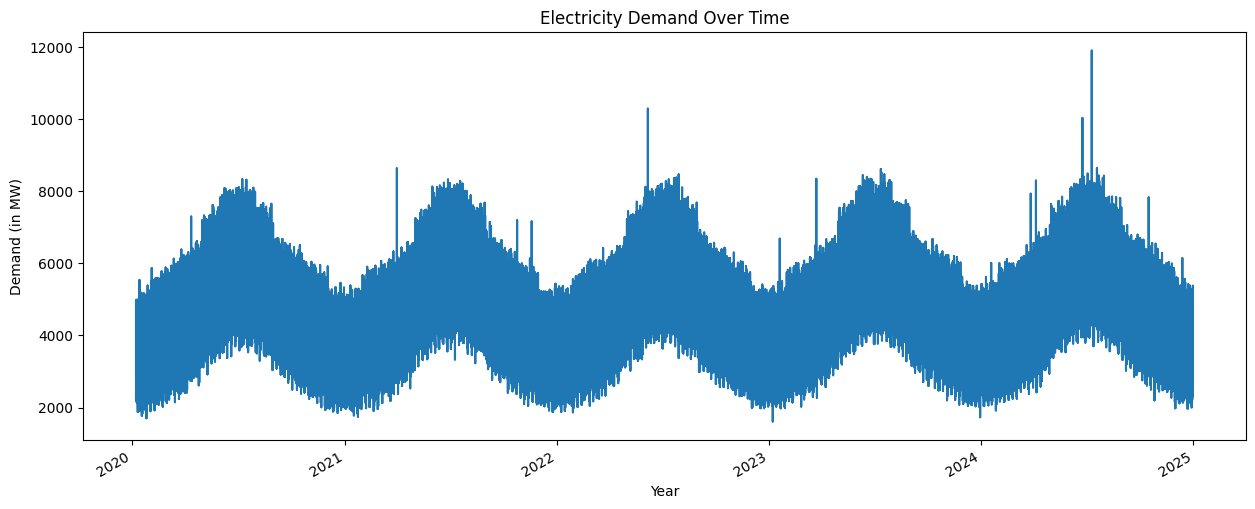

In [131]:
# plot raw demand over time
data['Demand'].plot(figsize = (15,6), title = 'Electricity Demand Over Time')
plt.xlabel('Year')
plt.ylabel('Demand (in MW)')
plt.show()

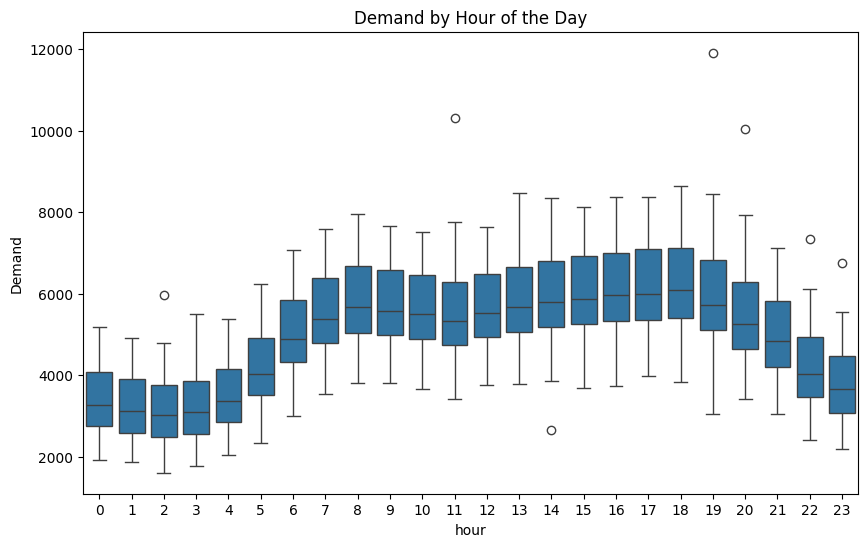

In [137]:
# Demand by hour of the day
plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = 'hour', y = 'Demand')
plt.title('Demand by Hour of the Day');

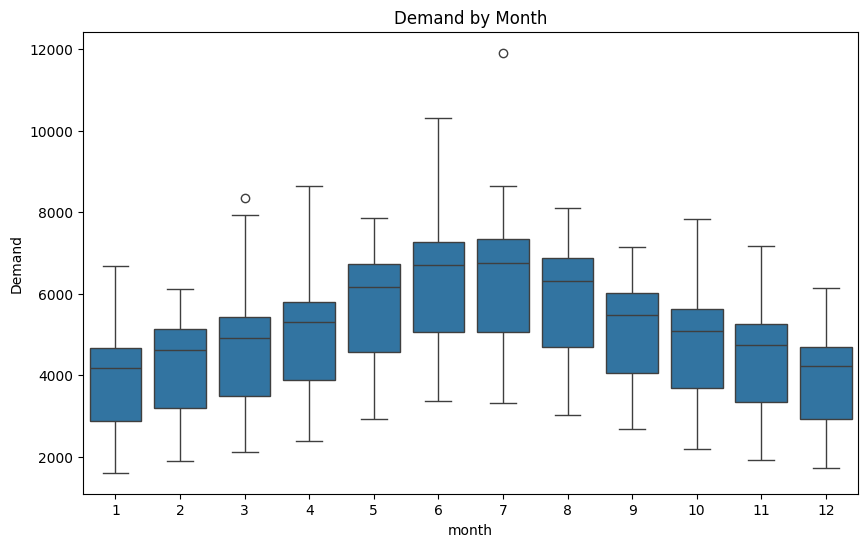

In [139]:
# Demand by Month
plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = 'month', y = 'Demand')
plt.title('Demand by Month');

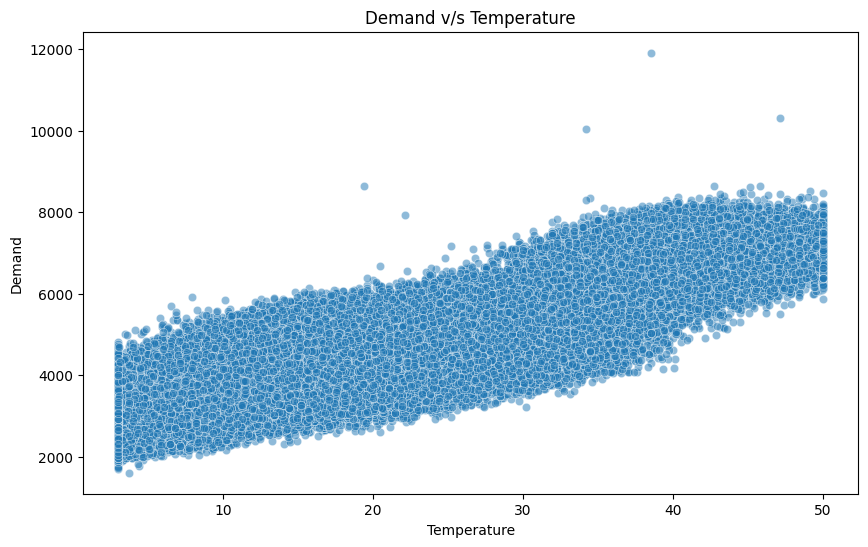

In [143]:
# Scatter plot :: Demand v/s Temperature
plt.figure(figsize = (10,6))
sns.scatterplot(data = data, x = 'Temperature', y = 'Demand', alpha = 0.5)
plt.title('Demand v/s Temperature')
plt.show()

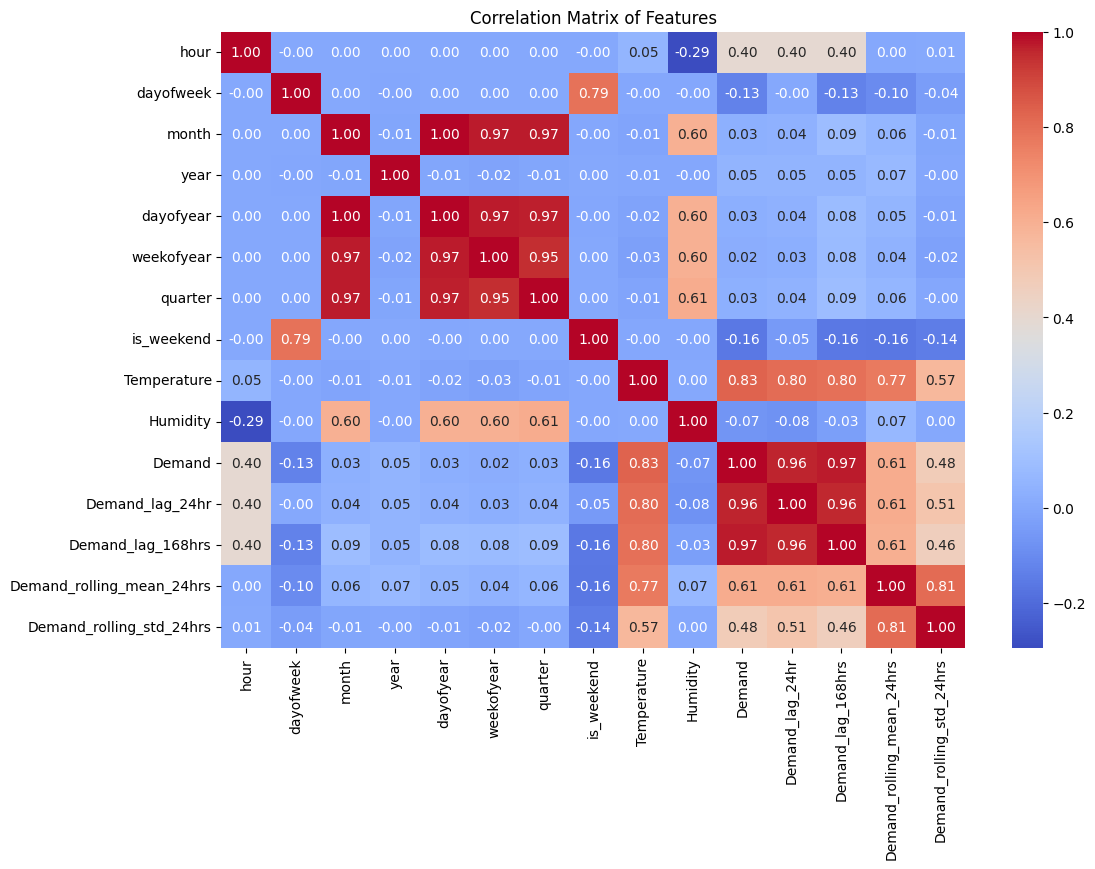

In [159]:
# Correlation Matrix
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# BUILDING THE MODEL - XGBOOST - DEMAND FORECASTING

In [164]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,Demand_lag_168hrs,Demand_rolling_mean_24hrs,Demand_rolling_std_24hrs
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [168]:
Y = data.Demand
Y

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 43676, dtype: float64

In [170]:
X = data.drop('Demand', axis = 1)
X

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,Demand_lag_168hrs,Demand_rolling_mean_24hrs,Demand_rolling_std_24hrs
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [172]:
# Splitting the data into training and testing 
X_train = X.loc[ : '2023-12-31']

In [174]:
X_train

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,Demand_lag_168hrs,Demand_rolling_mean_24hrs,Demand_rolling_std_24hrs
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,365,52,4,1,6.721774,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,365,52,4,1,7.557696,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,365,52,4,1,3.000000,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [178]:
Y_train = Y.loc[ : '2023-12-31']
Y_train

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2023-12-31    4185.721624
2023-12-31    3829.359810
2023-12-31    3416.409325
2023-12-31    3188.143951
2023-12-31    2631.860751
Name: Demand, Length: 34892, dtype: float64

In [180]:
X_test = X.loc['2024-01-01':]
X_test

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,Demand_lag_168hrs,Demand_rolling_mean_24hrs,Demand_rolling_std_24hrs
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,1,0,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,1,0,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,1,0,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,1,0,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,1,0,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [182]:
Y_test = Y.loc['2024-01-01':]
Y_test

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8784, dtype: float64

In [184]:
print(X_train.shape)
print(Y_train.shape)

(34892, 14)
(34892,)


In [186]:
print(X_test.shape)
print(Y_test.shape)

(8784, 14)
(8784,)


# BUILDING THE MODEL - XGBOOST - DEMAND FORECASTING

In [201]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit # For cross-validation, dealing with time-series data

In [203]:
# Initialize and train the model
model_xgb = XGBRegressor(n_estimators = 1000, 
                         early_stopping_rounds = 50,
                         learning_rate = 0.01, 
                         random_state = 42,
                         objective = 'reg:squarederror')

In [205]:
# Train the model
model_xgb.fit(X_train, Y_train, eval_set = [(X_train, Y_train),(X_test,Y_test)], verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

# MAKE PREDICTIONS - XGBOOST -DEMAND FORECASTING

In [209]:
xgb_pred = model_xgb.predict(X_test)

In [211]:
# Evaluating the model
rmse_xgb = np.sqrt(mean_squared_error(Y_test, xgb_pred))

mae_xgb = mean_absolute_error(Y_test, xgb_pred)

In [213]:
# Print the evaluation result ::
print('XGBoost RMSE:', rmse_xgb)
print('XGBoost MAE:', mae_xgb)

XGBoost RMSE: 174.82216218036348
XGBoost MAE: 123.47112975724238


# VISUALIZING THE PREDICTIONS - XGBOOST - DEMAND FORECASTING

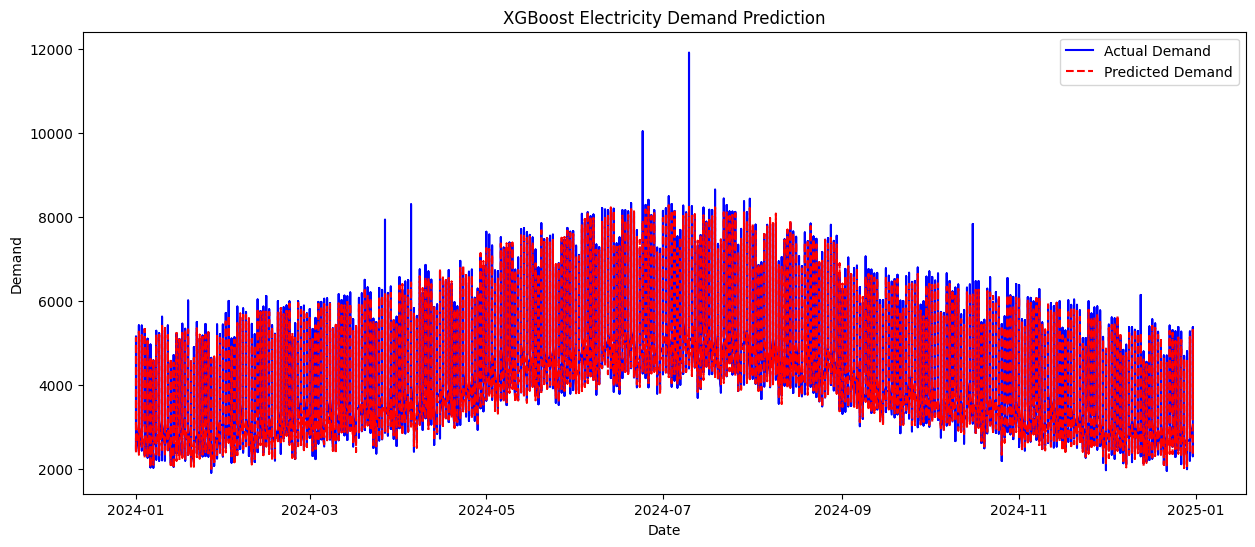

In [223]:
plt.figure(figsize = (15,6))
plt.plot(Y_test.index, Y_test, label = 'Actual Demand', color = 'Blue')
plt.plot(Y_test.index, xgb_pred, label = 'Predicted Demand', color = 'Red', linestyle = '--')
plt.title('XGBoost Electricity Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend();

In [225]:
# Save the model
import joblib
joblib.dump(model_xgb, 'electricity_xgb_prediction_model.pkl')

['electricity_xgb_prediction_model.pkl']

In [227]:
# load and Use
loaded_model = joblib.load('electricity_xgb_prediction_model.pkl')